In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Customer_Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)


In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [10]:
df1 = df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df1.TotalCharges =  pd.to_numeric(df1.TotalCharges)

D:\software\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


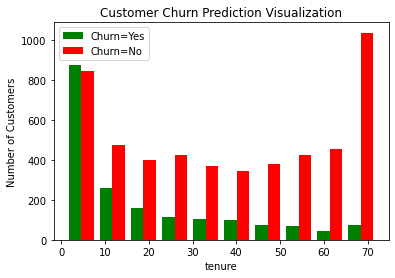

In [13]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no],color = ['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

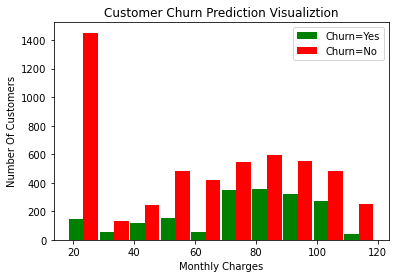

In [14]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [16]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)


D:\software\Anaconda\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace = True)

D:\software\Anaconda\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [20]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [21]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [22]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
df2.sample(45)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1987,1,0,1,1,25,1,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
6866,0,0,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2176,0,0,1,1,67,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
7015,0,1,1,0,34,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
5096,0,0,1,1,71,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
2582,1,0,0,1,12,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4036,1,0,1,1,18,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6288,0,0,0,0,2,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4288,0,0,0,1,3,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
277,0,1,1,0,21,1,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0


In [24]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [26]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
815,1,0,0,0,0.338028,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4044,1,0,1,0,0.971831,1,1,0,1,1,...,1,0,0,0,0,1,1,0,0,0
782,0,0,1,1,0.366197,1,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0


In [27]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [28]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
len(x_train.columns)

26

In [32]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
     keras.layers.Dense(15 , activation='relu'),
     keras.layers.Dense(1,activation='sigmoid'),
    
])

In [33]:
model.compile( optimizer= 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 3s 4ms/step - loss: 0.5212 - accuracy: 0.7207
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.7934
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.7966
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8020
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8053
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8073
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8069
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8100
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8092
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8114

In [35]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 925us/step - loss: 0.4637 - accuracy: 0.7747


[0.46374866366386414, 0.7746979594230652]

In [36]:
yp = model.predict(x_test)
yp[:5]

array([[0.40883738],
       [0.5329429 ],
       [0.00964531],
       [0.85478413],
       [0.31334862]], dtype=float32)

In [37]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 1, 1, 0]

In [39]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       999
           1       0.63      0.53      0.58       408

    accuracy                           0.77      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407



Text(69.0, 0.5, 'Truth')

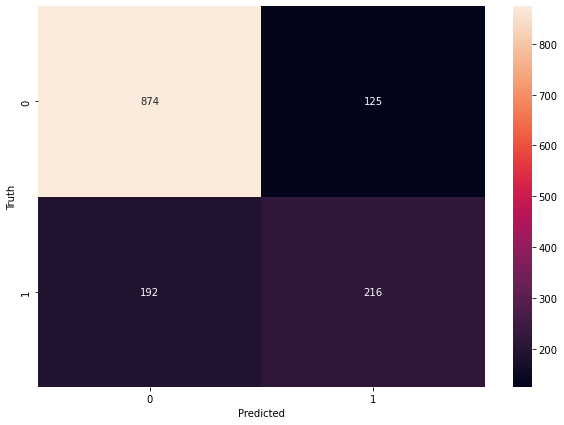

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
#class_count

count_class_0,count_class_1 = df1.Churn.value_counts()

#Divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]


In [44]:
df_class_0.shape

(5163, 27)

In [45]:
df_class_1.shape

(1869, 27)

In [49]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [50]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_undar = pd.concat([df_class_0_under,df_class_1],axis = 0)

print('Random under-sampling: ')
print(df_test_undar.Churn.value_counts())


Random under-sampling: 
0    1869
1    1869
Name: Churn, dtype: int64


In [53]:
x = df_test_undar.drop('Churn',axis='columns')
y = df_test_undar['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y )

In [54]:
def ANN(x_train,y_train,x_test,y_test,loss,weights):
    model = keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train,y_train,epochs=100)
        
    else:
        model.fit(x_train,y_train,epochs=100,class_weight=weights)
        
    print(model.evaluate(x_test,y_test))
    
    y_preds  = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print('Classification Report \n',classification_report(y_test,y_preds))
    
    return y_preds
    
    

In [55]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5828 - accuracy: 0.7100
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7358
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 0.7462
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7478
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7518
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7552
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7575
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7579
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7609
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7639
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8104
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8040
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8047
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8104
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8047
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8077
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8077
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8054
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8137
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8010
Epoch 93/100


# Method2: Oversampling

In [56]:
count_class_0,count_class_1

(5163, 1869)

In [60]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
print('Random over - sampling:')
print(df_test_over.Churn.value_counts())


Random over - sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [61]:
x = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y )

In [62]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [64]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 0.7357
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7602
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4769 - accuracy: 0.7659
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7703
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7724
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7757
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7735
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4602 - accuracy: 0.7749
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7755
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4552 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3749 - accuracy: 0.8324
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3736 - accuracy: 0.8335
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8324
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8328
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8327
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8345
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8349
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8355
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8354
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3706 - accuracy: 

# Method3:SMOTE

In [65]:
!pip install imbalanced-learn

In [67]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [70]:
from imblearn.over_sampling import SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [78]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [79]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [80]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5197 - accuracy: 0.7433
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4636 - accuracy: 0.7817
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.7804
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.7890
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7893
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7921
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7946
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7935
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.7990
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4295 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8495
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8525
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8507
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8529
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8523
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8502
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8529
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8538
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8523
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 

# Method 4 : Use Ensemble with undersampling

In [81]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [82]:
x  = df2.drop('Churn',axis='columns')
y = df2['Churn']


In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [85]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [86]:
df3 = x_train.copy()
df3['Churn'] = y_train

In [87]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [91]:
def get_train_batch(df_mejority , df_minority,start,end):
    df_train = pd.concat([df3_class0[:1495],df3_class1],axis=0)
    
    x_train = df_train.drop('Churn',axis = 'columns')
    y_train = df_train.Churn
    
    return x_train , y_train

In [92]:
x_train , y_train = get_train_batch(df3_class0,df3_class1,0,1495)

x_train.shape

(2990, 26)

In [93]:
y_pred1 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.6324
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7585
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4921 - accuracy: 0.7726
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4843 - accuracy: 0.7742
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7749
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7746
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7756
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7803
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7769
Epoch 11/

Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8187
Epoch 84/100
94/94 [==============================] - 0s 983us/step - loss: 0.4164 - accuracy: 0.8084
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8164
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8104
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8157
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8140
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8104
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8161
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8137
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.817

In [94]:
x_train , y_train = get_train_batch(df3_class0,df3_class1,1495,2990)
y_pred2 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.7027
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7615
Epoch 3/100
94/94 [==============================] - 0s 999us/step - loss: 0.4938 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7639
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7649
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.7702
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7739
Epoch 1

Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8181
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8161
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8197
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8167
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8157
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8167
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.8201
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8207
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8174
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8177


In [96]:
x_train , y_train = get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3 = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.6936
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7625
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7642
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.7692
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7712
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7763
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7799
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8154
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8154
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8090
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.8147
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8147
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8164
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8161
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8164
Epoch 90/100
94/94 [==============================] - 0s 1000us/step - loss: 0.3912 - accuracy: 0.8184
Epoch 91/100
94/94 [==============================] - 0s 999us/step - loss: 0.3894 - accuracy: 0.8234
Epoch 92

In [98]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [99]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.80      0.74      0.76      1407

